In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
import re



In [ ]:
df=pd.read_csv(r"G:\machinelearning\fake_or_real_news.csv")

In [ ]:
df.head()

In [4]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
df.info()

df.describe()

df.dtypes


df.shape

cat=[i for i in df.columns if df[i].dtypes=='O']
cat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


['title', 'text', 'label']

In [6]:
df.rename(columns={'Unnamed: 0':'Number'},inplace=True)

In [7]:
df.columns

Index(['Number', 'title', 'text', 'label'], dtype='object')

In [8]:
#Check for duplicate rows 
df.duplicated().sum()
#Display the duplicate rows



0

In [9]:
df['outcome']=df['label'].map({'FAKE':0,'REAL':1})

In [10]:
df.drop(['Number', 'label'], axis=1, inplace=True)

In [11]:
df.head()

,title,text,outcome
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [12]:
df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

In [13]:
df.head()

,title,text,outcome
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",0
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,0
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,1
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",0
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,1


In [14]:
df.shape


(6335, 3)

In [15]:
df['outcome'].value_counts()

outcome
1    3171
0    3164
Name: count, dtype: int64

C:\Users\home\AppData\Local\Temp\ipykernel_10452\1257343008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome',data=df,palette={'0': 'red', '1': 'green'})


Text(0.5, 1.0, 'fake and real news count')

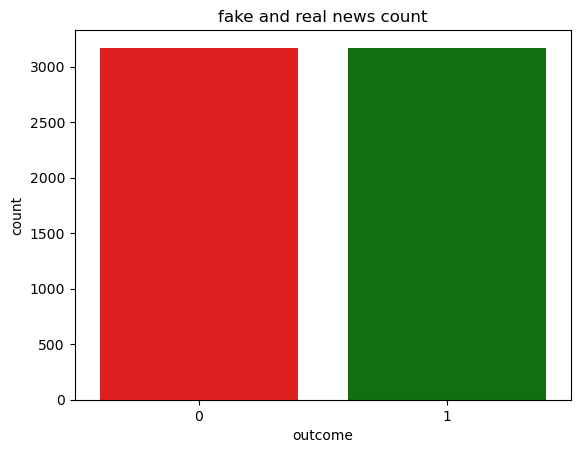

In [16]:
sns.countplot(x='outcome',data=df,palette={'0': 'red', '1': 'green'})
plt.title('fake and real news count')

In [17]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['title', 'text']


In [42]:
from nltk.stem import PorterStemmer
#removing extrs spaces ans all etc
def clean(text):
    new_text=re.sub(r'\$[^\s]+','doller',new_text)
    new_text=re.sub(r'[^a-z0-9\s]','',new_text)
    new_text=re.sub(r'[0-9]+','number',new_text)
    new_text=new_text.split(' ')
    new_text=list(map(lambda x:x.strip(),new_text))
    return new_text
    
    
   

In [43]:
df['title']=df['title'].apply(clean)

UnboundLocalError: cannot access local variable 'new_text' where it is not associated with a value

In [ ]:
df['text']=df['text'].apply(clean)

In [ ]:
df.head()

In [29]:
#splitting train and test
x=df.drop('outcome',axis=1)
y=df['outcome']

In [30]:
x.head()

,title,text
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello..."
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t..."
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...


In [31]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: outcome, dtype: int64

In [32]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
#vectorization
tfidf=TfidfVectorizer(max_df=0.7)

In [39]:
xtr_tfidf=tfidf.fit_transform(xtr)
xts_tfidf=tfidf.fit_transform(xts)

In [40]:
print(f"Shape of X_train_tfidf: {xtr_tfidf.shape}")
print(f"Shape of X_test_tfidf: {xts_tfidf.shape}")


Shape of X_train_tfidf: (2, 2)
Shape of X_test_tfidf: (2, 2)


In [41]:
model= MultinomialNB()
model.fit(xtr_tfidf,ytr)

ValueError: Found input variables with inconsistent numbers of samples: [2, 5068]